# Import datasets from kaggle

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heartbeat:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F29414%2F37484%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T132355Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D81168ce85a04274c60e8d7fb426b08063ecc86883f3f03cb87e931ff361b3c9c278afe537a190cc0d759c9f70009016cf57c99398a553e53611cd5c014b27665ed7d5995ea238eaffa3451ca13dc59456abb78ef470008fb72ed36c8352497adc0065fe3e3909287f192c00a8b6d453c2ad2e2a2dafb286cf79307dc279221694fd315306c963379fee64c86eeca945877886b7eac7bdbcafb43a230f10e0053068ad6627e02855ca0e1054f905ade602d65d9402f08b239d2e8ce2a07344b556540bd331819a68e7be3cb0f6fee292ffc0dd73606438b0f6acc1fab6c6c9383de326b4ad65414c2a6ec7d06366677068336580ac481a1c51bcefd1209d2c52c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 103633768 bytes downloaded
Downloaded and uncompressed: heartbeat
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/mitbih_train.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv


# Basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

# EDA

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape, test_df.shape

((87554, 188), (21892, 188))

In [ ]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


Some notes:
- we can not remove any columns even they are contain many zeros because the dataset is about heartbeat signals
- there is no need for scalling the data, since it is already scaled from zero to one

In [ ]:
train_df[187].astype(int).value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [ ]:
train_df[187].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
# change classes label to string labels
class_mapping = {
    0: "Normal beats",
    1: "Supraventrical ectopic beats",
    2: "Ventricular ectopic beats",
    3: "Fusion beats",
    4: "Unknown beats"
}
train_df[187] = train_df[187].map(class_mapping)
test_df[187] = test_df[187].map(class_mapping)


In [ ]:
train_df[187].value_counts()

187
Normal beats                    72471
Unknown beats                    6431
Ventricular ectopic beats        5788
Supraventrical ectopic beats     2223
Fusion beats                      641
Name: count, dtype: int64

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beats
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beats
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beats
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beats
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beats


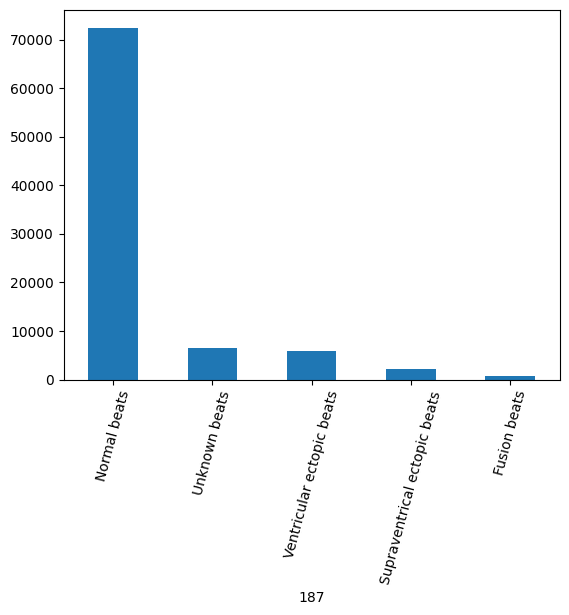

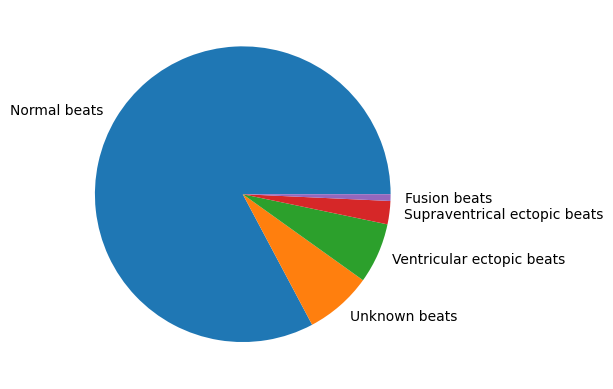

In [ ]:
train_df[187].value_counts().plot(kind = 'bar', rot = 75)
plt.show()
train_df[187].value_counts().plot(kind = 'pie', ylabel = "")
plt.show()

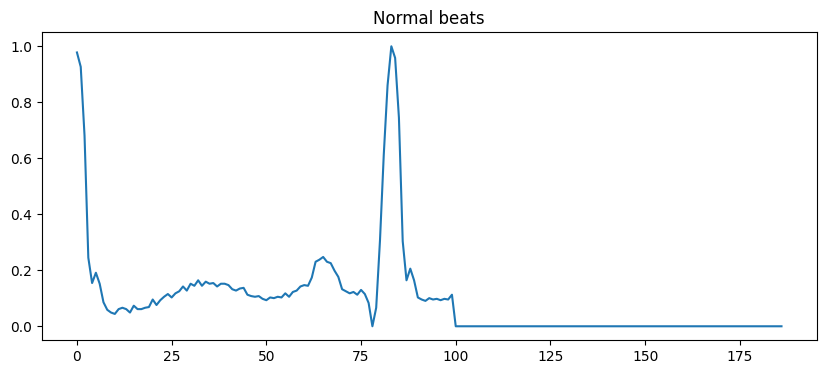

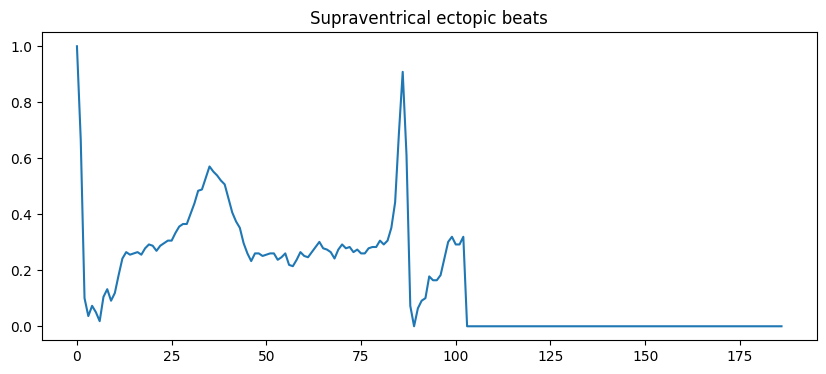

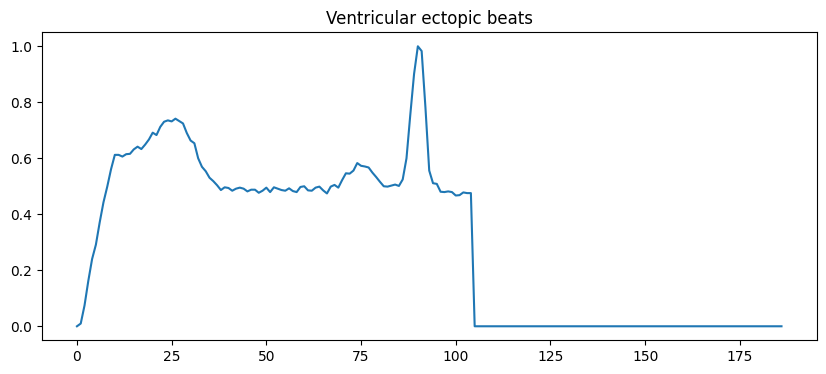

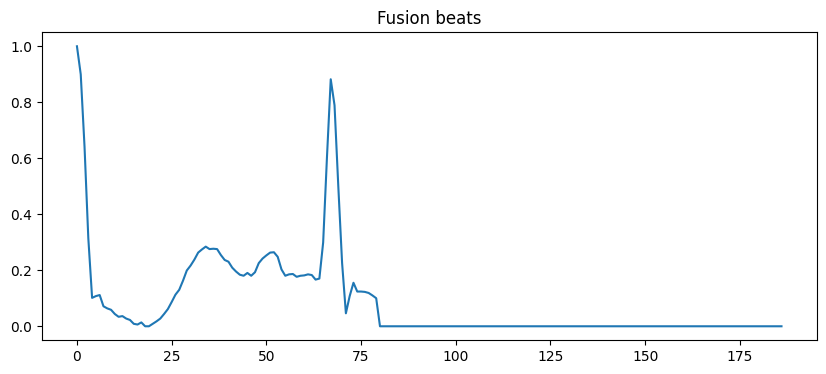

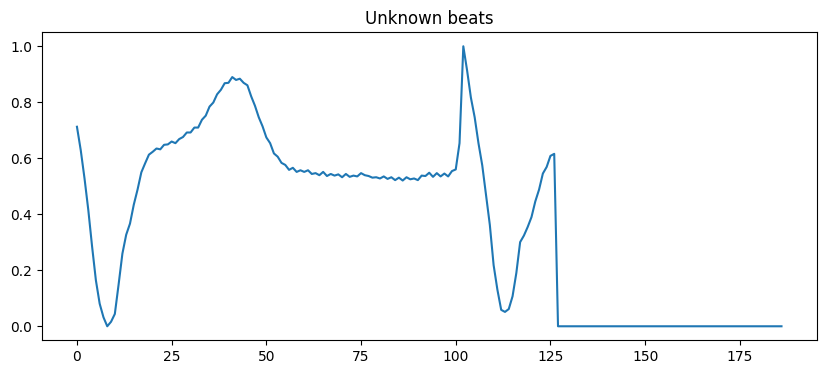

In [ ]:
unique_classes = train_df[187].unique()

# Loop over each class and plot the data for the first sample in that class
for class_label in unique_classes:
    class_data = train_df[train_df[187] == class_label].head(1)
    feature_values = class_data.iloc[:, 0:187].values[0]
    feature_indices = np.arange(0, 187)

    plt.figure(figsize=(10, 4))
    plt.plot(feature_indices, feature_values)
    plt.title(class_label)
    plt.show()

# Handle imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE

X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [ ]:
y_train_resampled.value_counts(), y_test_resampled.value_counts()

(187
 Normal beats                    72471
 Supraventrical ectopic beats    72471
 Ventricular ectopic beats       72471
 Fusion beats                    72471
 Unknown beats                   72471
 Name: count, dtype: int64,
 187
 Normal beats                    18118
 Supraventrical ectopic beats    18118
 Ventricular ectopic beats       18118
 Fusion beats                    18118
 Unknown beats                   18118
 Name: count, dtype: int64)

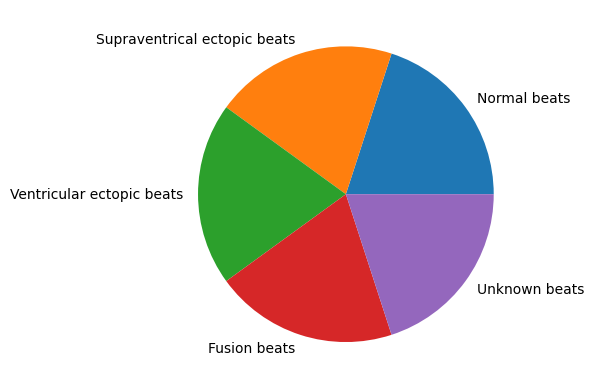

In [ ]:
y_train_resampled.value_counts().plot(kind = 'pie', ylabel = "")
plt.show()

# Modeling

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
print('Logistic Regression Classification Report:')
print(classification_report(y_test_resampled, lr.predict(X_test_resampled)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
                              precision    recall  f1-score   support

                Fusion beats       0.81      0.91      0.86     18118
                Normal beats       0.61      0.62      0.62     18118
Supraventrical ectopic beats       0.81      0.69      0.74     18118
               Unknown beats       0.93      0.92      0.93     18118
   Ventricular ectopic beats       0.73      0.75      0.74     18118

                    accuracy                           0.78     90590
                   macro avg       0.78      0.78      0.78     90590
                weighted avg       0.78      0.78      0.78     90590



In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
print('Random Forest Classification Report:')
print(classification_report(y_test_resampled, rf.predict(X_test_resampled)))

Random Forest Classification Report:
                              precision    recall  f1-score   support

                Fusion beats       0.98      0.84      0.91     18118
                Normal beats       0.75      0.99      0.86     18118
Supraventrical ectopic beats       0.99      0.83      0.90     18118
               Unknown beats       1.00      0.98      0.99     18118
   Ventricular ectopic beats       0.94      0.95      0.95     18118

                    accuracy                           0.92     90590
                   macro avg       0.93      0.92      0.92     90590
                weighted avg       0.93      0.92      0.92     90590



In [ ]:
print("LR accuracy:", accuracy_score(y_test_resampled, lr.predict(X_test_resampled)))
print("RF accuracy:", accuracy_score(y_test_resampled, rf.predict(X_test_resampled)))

LR accuracy: 0.7768848658792361
RF accuracy: 0.9192957280052986


In [ ]:
# Predict on a sample from test data
sample_to_pred = X_test_resampled.iloc[20215].values.reshape(1, -1)
pred = rf.predict(sample_to_pred)
print(f"correct prediction✅: {pred[0]}" if y_test_resampled[20215] == pred[0] else "not correct❌")

correct prediction✅: Fusion beats
